# Reflectance at TOA

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def legendre_polynomial(x, n): # Legendre polynomial of degree n

    ndim = n+1
    pn = np.zeros(ndim)
    if n == 0:
        pn[0] = 1.0
    elif n == 1:
        pn[0] = 1.0
        pn[1] = x
    else:
        pn[0] = 1.0
        pn[1] = x
        for r in range(2, ndim):
            pn[r] = (2.0*r - 1.0)/r*x*pn[r-1] - (r - 1.0)/r*pn[r-2]
    return pn

In [ ]:
def reflectance(mu, mu0, raz, w, tau0, xk, s_alb, F0):

#   Parameters:
    ndim = len(xk)
#
    vn = mu*mu0 + (np.sqrt(1.0 - mu*mu))*(np.sqrt(1.0 - mu0*mu0))*np.cos(raz)
    p = np.zeros_like(vn)
    for ind, val in enumerate(vn): #to highlight index and values
        pn = legendre_polynomial(val, ndim-1)
        p[ind] = np.dot(xk, pn)
#
    mup = -mu
    E0 = mu0*F0

    Rup = (mu0*F0*s_alb*np.exp(-tau0/mup - tau0/mu0) + 0.25*mu0*F0*p*w*mu0/(mu0 + mup)*(1.0 - np.exp(-tau0/mup - tau0/mu0)))/E0
#
    return Rup

In [ ]:
def reflectance(mu0, mu, raz, w, tau0, xk, s_alb, F0):

#   Parameters:
    ndim = len(xk)
#
    mus = -mu0
    vn = mu*mus + (np.sqrt(1.0 - mu*mu))*(np.sqrt(1.0 - mus*mus))*np.cos(raz)
    p = np.zeros_like(vn)
    for ind, val in enumerate(vn): #to highlight index and values
        pn = legendre_polynomial(val, ndim-1)
        p[ind] = np.dot(xk, pn)
#
    mup = -mu
    E0 = mu0*F0

    Rup = (mus*F0*s_alb*np.exp(-tau0/mup - tau0/mus) + 0.25*mus*F0*p*w*mus/(mus + mup)*(1.0 - np.exp(-tau0/mup - tau0/mus)))/E0
#
    return Rup

In [ ]:
tau0 = 0.3
w = 0.45 # @ 440 nm
s_alb = 0
F0 = 1
miu = 0.01745241
miu0 = 1.0
az_sol = -0.5*np.pi
az_veiw = 0.5*np.pi
miu0_pos = np.rint(miu0*90).astype(int)
miu_pos = np.rint(miu*90).astype(int)
raz = az_veiw - az_sol
xk = np.array([1.0, 0.0, 0.5])
mu0 = np.linspace(0.001, 1.0, 91)
mu = -np.linspace(0.001, 1.0 , 91)
raz = np.linspace(0.0, raz, 1801)
nmu0 = len(mu0)
nmu = len(mu)
naz = len(raz)
Rup = np.zeros((nmu0, nmu, naz))

for imu0 in range(len(mu0)):
    for imu in range(len(mu)):
        Rup[imu0, imu, :] = reflectance(mu0[imu0], mu[imu], raz, w, tau0, xk, s_alb, F0)

# Computation of Reflectance
#print(f' The reflectance(for mu = {miu} and mu0 = {miu0}) at TOA  = {Rup[miu0_pos, miu_pos,:].mean()}')
print(f' The reflectance(for mu = {miu} and mu0 = {miu0}) at TOA  = {Rup[:, 89,:].mean()}')

 The reflectance(for mu = 0.01745241 and mu0 = 1.0) at TOA  = -0.06872771447824189


In [ ]:
print(f' The reflectance(for mu = {miu} and mu0 = {miu0}) at TOA  = {Rup[:, 45, :].mean()}')

 The reflectance(for mu = 0.01745241 and mu0 = 1.0) at TOA  = -4.500449160614307e+127


In [ ]:
tau0 = 0.2
w = 0.88 # @ 440 nm
s_alb = 0
F0 = 1
miu = 1.0
miu0 = 0.5
az_sol = -0.5*np.pi
az_veiw = 0.5*np.pi
miu0_pos = np.rint(miu0*90).astype(int)
miu_pos = np.rint(miu*90).astype(int)
raz = az_veiw - az_sol
xk = np.array([1.0, 0.0, 0.5])
mu0 = np.linspace(0.001, 1.0, 91)
mu = -np.linspace(0.001, 1.0 , 91)
raz = np.linspace(0.0, raz, 1801)
nmu0 = len(mu0)
nmu = len(mu)
naz = len(raz)
Rup = np.zeros((nmu0, nmu, naz))

for imu0 in range(len(mu0)):
    for imu in range(len(mu)):
        Rup[imu0, imu, :] = reflectance(mu[imu], mu0[imu0], raz, w, tau0, xk, s_alb, F0)

# Computation of Reflectance
print(f' The reflectance(for mu = {miu} and mu0 = {miu0}) at TOA  = {Rup[miu0_pos, miu_pos,:].mean()}')

 The reflectance(for mu = 1.0 and mu0 = 0.5) at TOA  = 0.031037198406487096


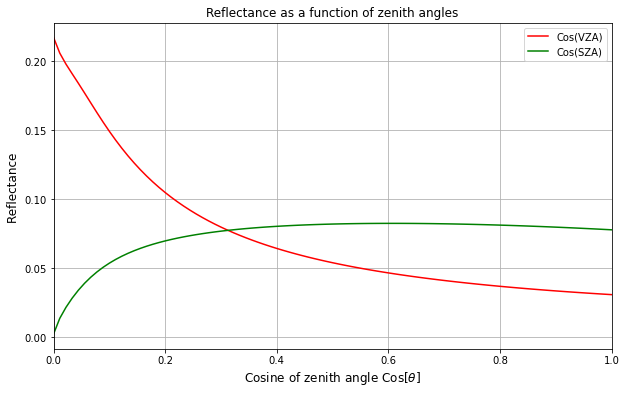

In [ ]:
#************PLOT*******************
fig,ax=plt.subplots(figsize=(10,6))
Rs_up = np.mean(Rup,axis=(1,2))
Rv_up = np.mean(Rup,axis=(0,2))
view_angle =np.linspace(0,1,91)
ax.plot(view_angle,Rv_up,"-",label="Cos(VZA)",color="red")
ax.plot(view_angle,Rs_up,"-",label="Cos(SZA)",color="green")
ax.set_xlabel(r'Cosine of zenith angle Cos[$\theta$]',fontsize='large')
ax.set_ylabel('Reflectance ',fontsize='large')
ax.set_xlim(0.0,1)
plt.legend()
ax.grid(True)
ax.set_title('Reflectance as a function of zenith angles',fontsize='large')
plt.show()

Text(0.5, 1.0, 'Reflectance as a function of cosine (zenith angles)')

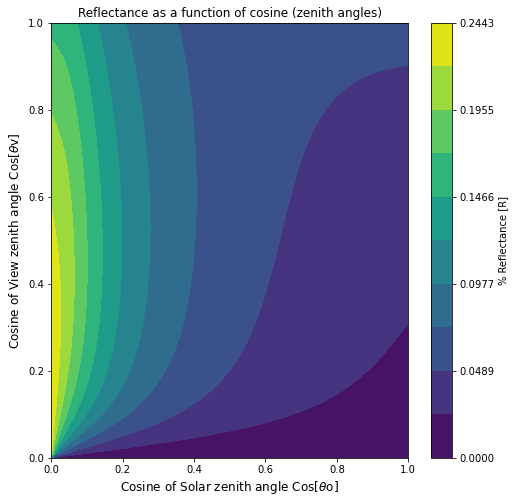

In [ ]:
fig,ax=plt.subplots(figsize = (8,8))

x = np.linspace(0,1,91)
y = np.linspace(0,1,91)
t = np.mean(Rup,axis=2)

c=ax.contourf(x,y,t,levels=np.linspace(0,t.max(),11))
fig.colorbar(c,ax=ax,label='% Reflectance [R]')
ax.set_xlabel(r'Cosine of Solar zenith angle Cos[$\theta$o]',fontsize='large')
ax.set_ylabel(r'Cosine of View zenith angle Cos[$\theta$v]',fontsize='large')
ax.set_title('Reflectance as a function of cosine (zenith angles)',fontsize='large')